# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

### Exercise 07.1
In the NSL simulator code we have provided, include tail corrections for potential energy, $U$, and pressure $P$.

### Exercise 07.2

Use the NSL simulator code to <span style="color:red">print out instantaneous values of potential energy per particle, $U/N$, along **equilibrated** Monte Carlo simulations</span> (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ to approximately estimate how large the blocks in your simulations should be.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

### Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the NSL simulator code</span>: average value of $g(r)$ in each block, final average value of $g(r)$ with statistical uncertainties in a separate file.

### Exercise 07.4

By means of your upgraded NSL simulator code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in LJ units ... <span style="color:red"> and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

## SUBMISSION

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
en_data_solid=pd.read_fwf("./NSL_SIMULATOR/OUTPUT/Ex_2/solid/potential_energy.dat").iloc[:, 1:3]
en_data_liquid=pd.read_fwf("./NSL_SIMULATOR/OUTPUT/Ex_2/liquid/potential_energy.dat").iloc[:, 1:3]
en_data_gas=pd.read_fwf("./NSL_SIMULATOR/OUTPUT/Ex_2/gas/potential_energy.dat").iloc[:, 1:3]

In [4]:
def datablocking(vector,M,N):

    _global=0
    _global2=0
    _err=0
    data={"BLOCK":[],"ACTUAL":[],"AVERAGE":[],"ERROR":[]}

    for n in range(N):

        sum_i=0

        for i in range(int(M/N)):
            sum_i+=vector[n*int(M/N)+i]

        average=sum_i/(M/N)
        _global+=average
        _global2+=average**2
        _err=np.sqrt(abs(_global2/(n+1)-(_global/(n+1))**2)/(n+1))
        
        data["BLOCK"].append(n+1)
        data['ACTUAL'].append(average)
        data['AVERAGE'].append(_global/(n+1))
        data['ERROR'].append(_err)
    
    return data

### EX - 07.2

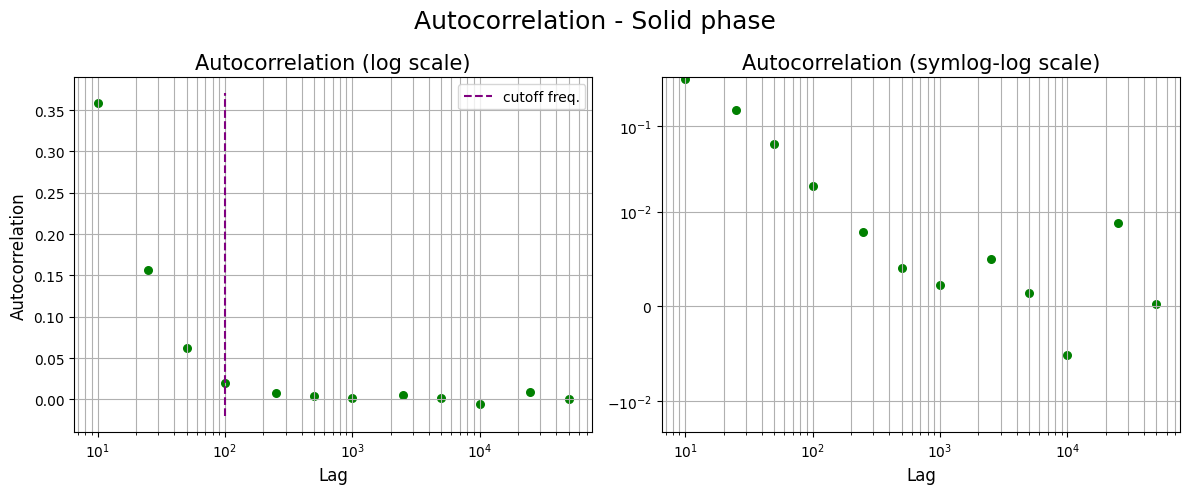

In [9]:
from statsmodels.tsa.stattools import acf

autocorr=acf(en_data_solid['ACTUAL_PE:'],True,50000)
data_autocorr={"Lag":[],"Autocorrelation":[]}
for i in range(50000):
    if (i+1)==10 or (i+1)==25 or (i+1)==50 or (i+1)==100 or (i+1)==250 or (i+1)==500 or (i+1)==1000 or (i+1)==2500 or (i+1)==5000 or (i+1)==10000 or (i+1)==25000 or (i+1)==50000:
        data_autocorr['Lag'].append(i+1)
        data_autocorr['Autocorrelation'].append(autocorr[i])

fig=plt.figure(figsize=(12,5))

ax1=fig.add_subplot(1,2,1)
ax1.scatter(data_autocorr['Lag'],data_autocorr['Autocorrelation'],s=30,color='green')
ax1.vlines(100,-0.02,0.37,colors='purple',linestyles="--",label=r'cutoff freq.')
ax1.set_xscale('log')
ax1.set_xlabel(r'Lag',fontsize=12)
ax1.set_ylabel(r'Autocorrelation',fontsize=12)
ax1.set_title(r'Autocorrelation (log scale)',fontsize=15)
ax1.grid(True,which="both")
ax1.legend()

ax2=fig.add_subplot(1,2,2)
ax2.scatter(data_autocorr['Lag'],data_autocorr['Autocorrelation'],s=30,color='green')
ax2.set_xscale('log')
ax2.set_yscale('symlog',linthresh=0.01)
ax2.set_xlabel(r'Lag',fontsize=12)
#ax2.set_ylabel(r'Autocorrelation+1',fontsize=12)
ax2.set_title(r"Autocorrelation (symlog-log scale)",fontsize=15)
ax2.grid(True,which="both")

fig.suptitle(r"Autocorrelation - Solid phase",fontsize=18)
plt.tight_layout()
plt.show()

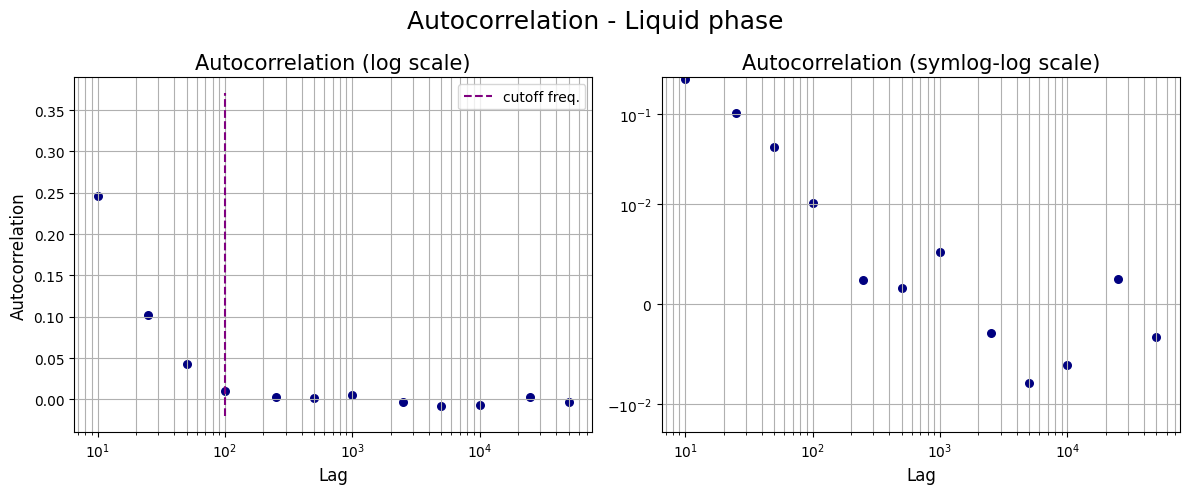

In [10]:
autocorr_liquid=acf(en_data_liquid['ACTUAL_PE:'],True,50000)
data_autocorr_liquid={"Lag":[],"Autocorrelation":[]}
for i in range(50000):
    if (i+1)==10 or (i+1)==25 or (i+1)==50 or (i+1)==100 or (i+1)==250 or (i+1)==500 or (i+1)==1000 or (i+1)==2500 or (i+1)==5000 or (i+1)==10000 or (i+1)==25000 or (i+1)==50000:
        data_autocorr_liquid['Lag'].append(i+1)
        data_autocorr_liquid['Autocorrelation'].append(autocorr_liquid[i])

fig=plt.figure(figsize=(12,5))

ax3=fig.add_subplot(1,2,1)
ax3.scatter(data_autocorr_liquid['Lag'],data_autocorr_liquid['Autocorrelation'],s=30,color='navy')
ax3.vlines(100,-0.02,0.37,colors='purple',linestyles="--",label=r'cutoff freq.')
ax3.set_xscale('log')
ax3.set_xlabel(r'Lag',fontsize=12)
ax3.set_ylabel(r'Autocorrelation',fontsize=12)
ax3.set_title(r'Autocorrelation (log scale)',fontsize=15)
ax3.grid(True,which="both")
ax3.legend()

ax4=fig.add_subplot(1,2,2)
ax4.scatter(data_autocorr_liquid['Lag'],data_autocorr_liquid['Autocorrelation'],s=30,color='navy')
ax4.set_xscale('log')
ax4.set_yscale('symlog',linthresh=0.01)
ax4.set_xlabel(r'Lag',fontsize=12)
#ax4.set_ylabel(r'Autocorrelation',fontsize=12)
ax4.set_title(r"Autocorrelation (symlog-log scale)",fontsize=15)
ax4.grid(True,which="both")

fig.suptitle(r"Autocorrelation - Liquid phase",fontsize=18)
plt.tight_layout()
plt.show()

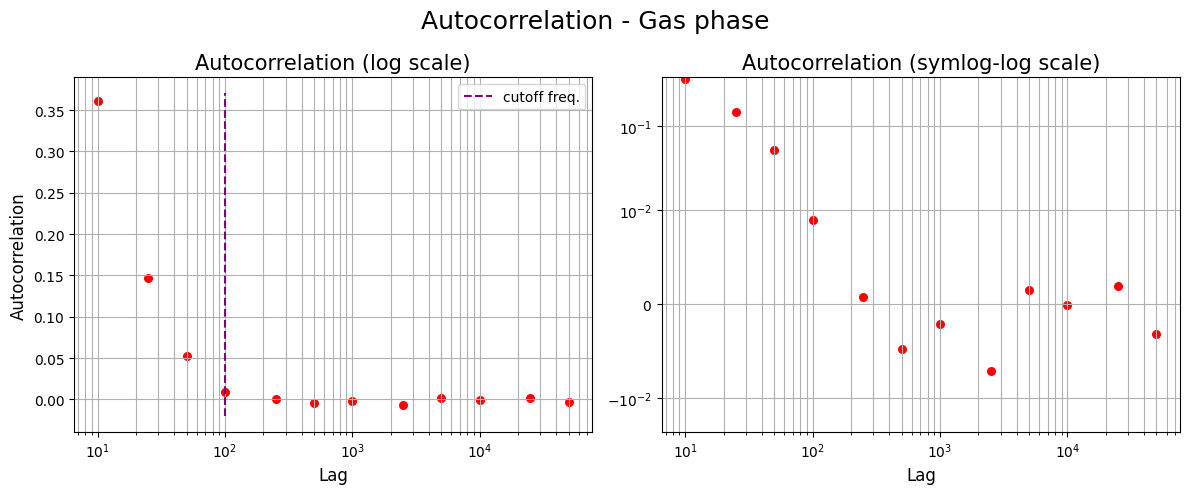

In [11]:
autocorr_gas=acf(en_data_gas['ACTUAL_PE:'],True,50000)
data_autocorr_gas={"Lag":[],"Autocorrelation":[]}
for i in range(50000):
    if (i+1)==10 or (i+1)==25 or (i+1)==50 or (i+1)==100 or (i+1)==250 or (i+1)==500 or (i+1)==1000 or (i+1)==2500 or (i+1)==5000 or (i+1)==10000 or (i+1)==25000 or (i+1)==50000:
        data_autocorr_gas['Lag'].append(i+1)
        data_autocorr_gas['Autocorrelation'].append(autocorr_gas[i])

fig=plt.figure(figsize=(12,5))

ax5=fig.add_subplot(1,2,1)
ax5.scatter(data_autocorr_gas['Lag'],data_autocorr_gas['Autocorrelation'],s=30,color='red')
ax5.vlines(100,-0.02,0.37,colors='purple',linestyles="--",label=r'cutoff freq.')
ax5.set_xscale('log')
ax5.set_xlabel(r'Lag',fontsize=12)
ax5.set_ylabel(r'Autocorrelation',fontsize=12)
ax5.set_title(r'Autocorrelation (log scale)',fontsize=15)
ax5.grid(True,which="both")
ax5.legend()

ax6=fig.add_subplot(1,2,2)
ax6.scatter(data_autocorr_gas['Lag'],data_autocorr_gas['Autocorrelation'],s=30,color='red')
ax6.set_xscale('log')
ax6.set_yscale('symlog',linthresh=0.01)
ax6.set_xlabel(r'Lag',fontsize=12)
#ax6.set_ylabel(r'Autocorrelation',fontsize=12)
ax6.set_title(r"Autocorrelation (symlog-log scale)",fontsize=15)
ax6.grid(True,which="both")

fig.suptitle(r"Autocorrelation - Gas phase",fontsize=18)
plt.tight_layout()
plt.show()

In [12]:
data_solid={"L":[],"AVERAGE":[],"ERROR":[]}
data_liquid={"L":[],"AVERAGE":[],"ERROR":[]}
data_gas={"L":[],"AVERAGE":[],"ERROR":[]}

N=[50000,20000,10000,5000,2000,1000,500,200,100,50,20,10]

for n in N:

    data_solid['L'].append(int(500000/n))
    appo=datablocking(en_data_solid['ACTUAL_PE:'],500000,n)
    data_solid["AVERAGE"].append(appo['AVERAGE'][n-1])
    data_solid["ERROR"].append(appo['ERROR'][n-1])

    data_liquid['L'].append(int(500000/n))
    appo1=datablocking(en_data_liquid['ACTUAL_PE:'],500000,n)
    data_liquid["AVERAGE"].append(appo1['AVERAGE'][n-1])
    data_liquid["ERROR"].append(appo1['ERROR'][n-1])

    data_gas['L'].append(int(500000/n))
    appo2=datablocking(en_data_gas['ACTUAL_PE:'],500000,n)
    data_gas["AVERAGE"].append(appo2['AVERAGE'][n-1])
    data_gas["ERROR"].append(appo2['ERROR'][n-1])


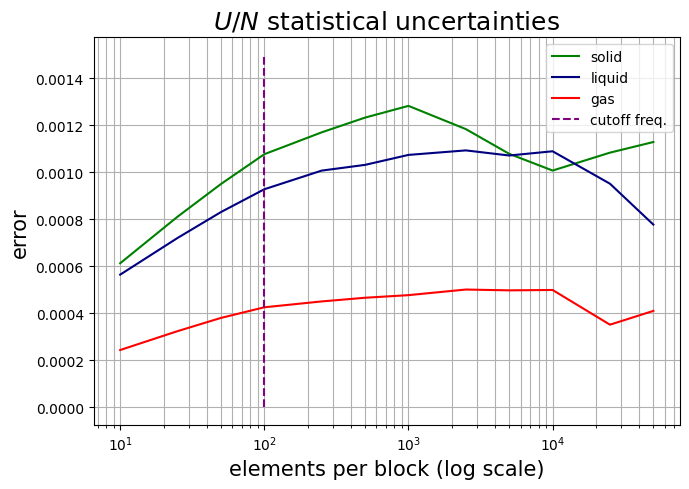

In [13]:
plt.figure(figsize=(7,5))

plt.plot(data_solid['L'],data_solid['ERROR'],color='green',label=r'solid')
plt.plot(data_liquid['L'],data_liquid['ERROR'],color='navy',label=r'liquid')
plt.plot(data_gas['L'],data_gas['ERROR'],color='red',label=r'gas')
plt.vlines(100,0,0.0015,colors='purple',linestyles="--",label=r'cutoff freq.')
plt.xscale('log')
plt.xlabel(r"elements per block (log scale)",fontsize=15)
plt.ylabel(r'error',fontsize=15)
plt.title(r'$U/N$ statistical uncertainties',fontsize=18)
plt.legend()
plt.grid(True,which='both')
plt.tight_layout()
plt.show()

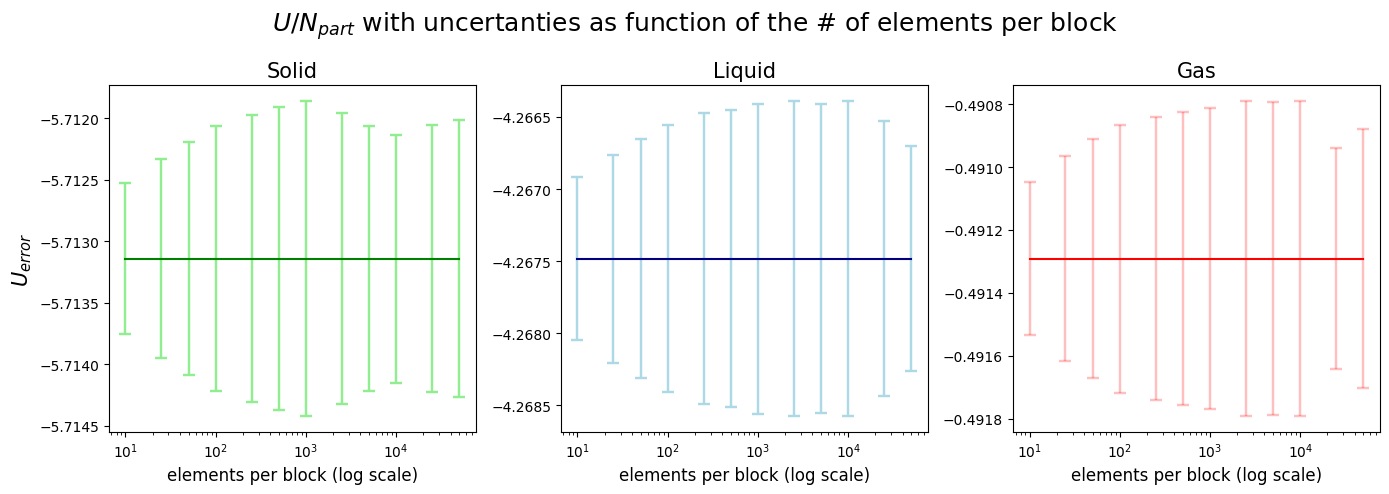

In [14]:
fig=plt.figure(figsize=(14,5))

ax1=fig.add_subplot(1,3,1)
ax1.errorbar(x=data_solid['L'],y=data_solid['AVERAGE'],yerr=data_solid['ERROR'],color='green',ecolor='lightgreen',label=r'solid',elinewidth=1.75, capsize=4, capthick=1.75)
#ax1.plot(data_solid['L'],data_solid['ERROR'],color='green',label=r'solid')
ax1.set_xscale('log')
ax1.set_xlabel(r"elements per block (log scale)",fontsize=12)
ax1.set_ylabel(r'$U_{error}$',fontsize=15)
ax1.set_title(r'Solid',fontsize=15)
#ax1.legend()

ax2=fig.add_subplot(1,3,2)
ax2.errorbar(x=data_liquid['L'],y=data_liquid['AVERAGE'],yerr=data_liquid['ERROR'],color='navy',ecolor='lightblue',label=r'liquid',elinewidth=1.75, capsize=4, capthick=1.75)
ax2.set_xscale('log')
ax2.set_xlabel(r"elements per block (log scale)",fontsize=12)
#ax2.set_ylabel(r'$\frac{U}{N_{part}}$',fontsize=15)
ax2.set_title(r'Liquid',fontsize=15)
#ax2.legend()

ax3=fig.add_subplot(1,3,3)
ax3.errorbar(x=data_gas['L'],y=data_gas['AVERAGE'],yerr=data_gas['ERROR'],color='red',ecolor=(1.0, 0.0, 0.0, 0.25),label=r'liquid',elinewidth=1.75, capsize=4, capthick=1.75)
ax3.set_xscale('log')
ax3.set_xlabel(r"elements per block (log scale)",fontsize=12)
#ax3.set_ylabel(r'$\frac{U}{N_{part}}$',fontsize=15)
ax3.set_title(r'Gas',fontsize=15)
#ax3.legend()

plt.suptitle(r'$U/N_{part}$ with uncertanties as function of the # of elements per block',fontsize=18)
plt.tight_layout()
plt.show()

### EX - 07.3

In [21]:
#LOADING GOFR NVT AND NVE
gofr_solid_NVT=np.loadtxt("./NSL_SIMULATOR/OUTPUT/solid/gofr_fin_NVT.dat")
gofr_liquid_NVT=np.loadtxt("./NSL_SIMULATOR/OUTPUT/liquid/gofr_fin_NVT.dat")
gofr_gas_NVT=np.loadtxt("./NSL_SIMULATOR/OUTPUT/gas/gofr_fin_NVT.dat")

gofr_solid_NVE=np.loadtxt("./NSL_SIMULATOR/OUTPUT/solid/gofr_fin_NVE.dat")
gofr_liquid_NVE=np.loadtxt("./NSL_SIMULATOR/OUTPUT/liquid/gofr_fin_NVE.dat")
gofr_gas_NVE=np.loadtxt("./NSL_SIMULATOR/OUTPUT/gas/gofr_fin_NVE.dat")


In [22]:
#LOADING POTENTIAL ENERGY
pot_solid_NVT=np.loadtxt("./NSL_SIMULATOR/OUTPUT/solid/potential_energy_NVT.dat")
pot_liquid_NVT=np.loadtxt("./NSL_SIMULATOR/OUTPUT/liquid/potential_energy_NVT.dat")
pot_gas_NVT=np.loadtxt("./NSL_SIMULATOR/OUTPUT/gas/potential_energy_NVT.dat")

#LOADING PRESSURE
pre_solid_NVT=np.loadtxt("./NSL_SIMULATOR/OUTPUT/solid/pressure_NVT.dat")
pre_liquid_NVT=np.loadtxt("./NSL_SIMULATOR/OUTPUT/liquid/pressure_NVT.dat")
pre_gas_NVT=np.loadtxt("./NSL_SIMULATOR/OUTPUT/gas/pressure_NVT.dat")

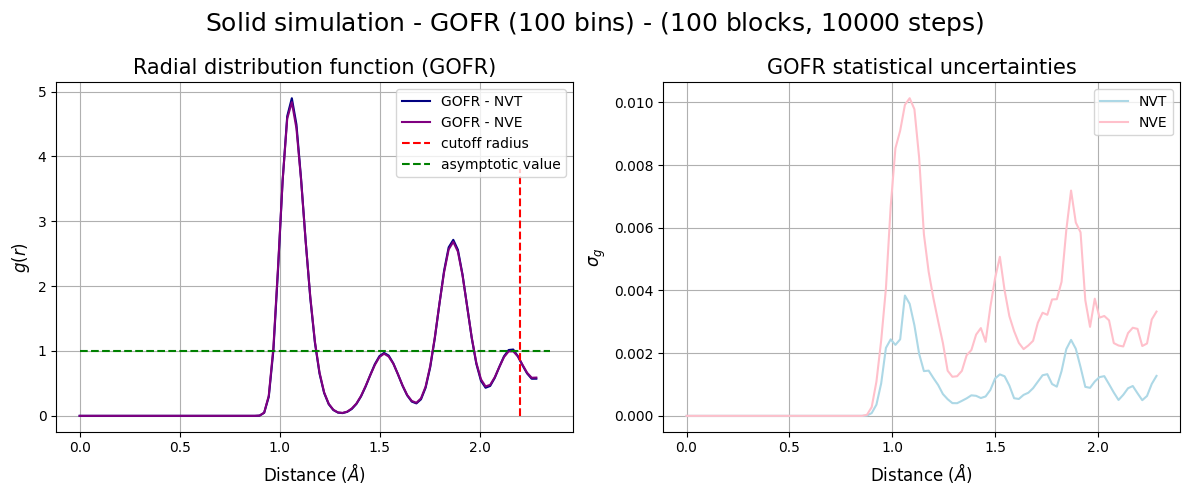

In [20]:
fig=plt.figure(figsize=(12,5))

ax1=fig.add_subplot(1,2,1)
ax1.plot(gofr_solid_NVT[:,0],gofr_solid_NVT[:,1],c='navy',label=r'GOFR - NVT')
ax1.plot(gofr_solid_NVE[:,0],gofr_solid_NVE[:,1],c='purple',label=r'GOFR - NVE')
ax1.vlines(x=2.2,ymin=0,ymax=3.8,color='red',linestyles='--',label=r'cutoff radius')
ax1.hlines(y=1,xmin=0,xmax=2.35,color='green',linestyles='--',label=r'asymptotic value')
ax1.set_xlabel(r'Distance ($\AA$)',fontsize=12)
ax1.set_ylabel(r'$g(r)$',fontsize=12)
ax1.set_title(r'Radial distribution function (GOFR)',fontsize=15)
ax1.grid(True)
ax1.legend()

ax2=fig.add_subplot(1,2,2)
ax2.plot(gofr_solid_NVT[:,0],gofr_solid_NVT[:,2],c='lightblue',label=r'NVT')
ax2.plot(gofr_solid_NVE[:,0],gofr_solid_NVE[:,2],c='pink',label=r'NVE')
ax2.set_xlabel(r'Distance ($\AA$)',fontsize=12)
ax2.set_ylabel(r'$\sigma_g$',fontsize=12)
ax2.set_title(r'GOFR statistical uncertainties',fontsize=15)
ax2.legend()
ax2.grid(True)

plt.suptitle(r'Solid simulation - GOFR ($100$ bins) - ($100$ blocks, $10000$ steps)',fontsize=18)
plt.tight_layout()
plt.show()

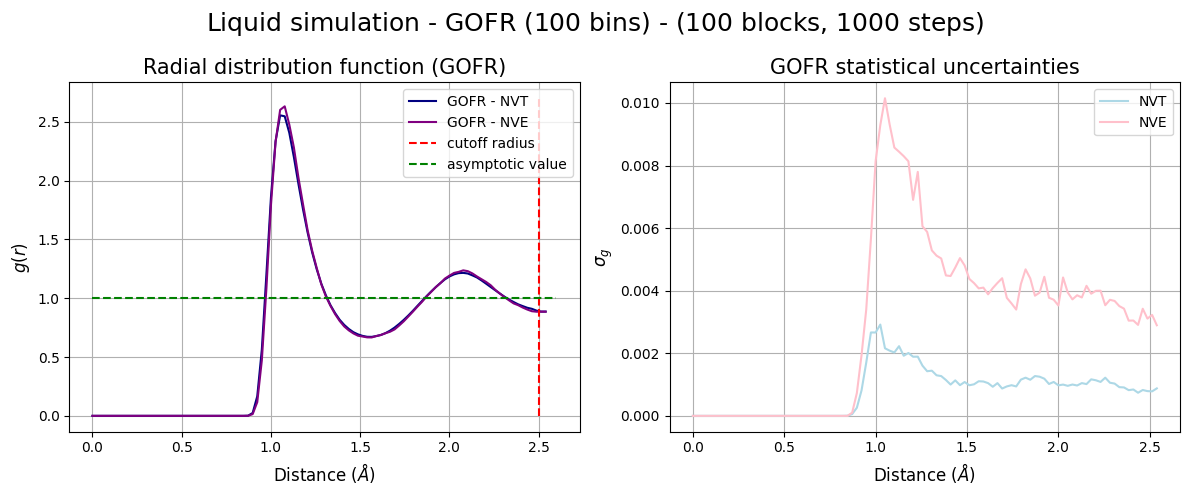

In [19]:
fig=plt.figure(figsize=(12,5))

ax3=fig.add_subplot(1,2,1)
ax3.plot(gofr_liquid_NVT[:,0],gofr_liquid_NVT[:,1],c='navy',label=r'GOFR - NVT')
ax3.plot(gofr_liquid_NVE[:,0],gofr_liquid_NVE[:,1],c='purple',label=r'GOFR - NVE')
ax3.vlines(x=2.5,ymin=0,ymax=2.7,color='red',linestyles='--',label=r'cutoff radius')
ax3.hlines(y=1,xmin=0,xmax=2.6,color='green',linestyles='--',label=r'asymptotic value')
ax3.set_xlabel(r'Distance ($\AA$)',fontsize=12)
ax3.set_ylabel(r'$g(r)$',fontsize=12)
ax3.set_title(r'Radial distribution function (GOFR)',fontsize=15)
ax3.grid(True)
ax3.legend()

ax4=fig.add_subplot(1,2,2)
ax4.plot(gofr_liquid_NVT[:,0],gofr_liquid_NVT[:,2],c='lightblue',label=r'NVT')
ax4.plot(gofr_liquid_NVE[:,0],gofr_liquid_NVE[:,2],c='pink',label=r'NVE')
ax4.set_xlabel(r'Distance ($\AA$)',fontsize=12)
ax4.set_ylabel(r'$\sigma_g$',fontsize=12)
ax4.set_title(r'GOFR statistical uncertainties',fontsize=15)
ax4.legend()
ax4.grid(True)

plt.suptitle(r'Liquid simulation - GOFR ($100$ bins) - ($100$ blocks, $1000$ steps)',fontsize=18)
plt.tight_layout()
plt.show()

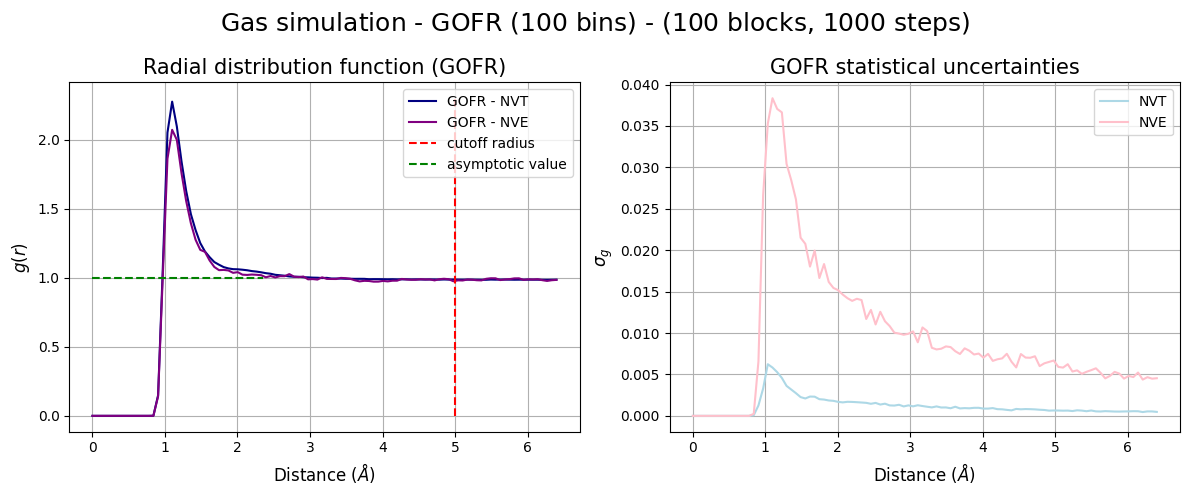

In [15]:
fig=plt.figure(figsize=(12,5))

ax1=fig.add_subplot(1,2,1)
ax1.plot(gofr_gas_NVT[:,0],gofr_gas_NVT[:,1],c='navy',label=r'GOFR - NVT')
ax1.plot(gofr_gas_NVE[:,0],gofr_gas_NVE[:,1],c='purple',label=r'GOFR - NVE')
ax1.vlines(x=5.0,ymin=0,ymax=2.3,color='red',linestyles='--',label=r'cutoff radius')
ax1.hlines(y=1,xmin=0,xmax=2.35,color='green',linestyles='--',label=r'asymptotic value')
ax1.set_xlabel(r'Distance ($\AA$)',fontsize=12)
ax1.set_ylabel(r'$g(r)$',fontsize=12)
ax1.set_title(r'Radial distribution function (GOFR)',fontsize=15)
ax1.grid(True)
ax1.legend()

ax2=fig.add_subplot(1,2,2)
ax2.plot(gofr_gas_NVT[:,0],gofr_gas_NVT[:,2],c='lightblue',label=r'NVT')
ax2.plot(gofr_gas_NVE[:,0],gofr_gas_NVE[:,2],c='pink',label=r'NVE')
ax2.set_xlabel(r'Distance ($\AA$)',fontsize=12)
ax2.set_ylabel(r'$\sigma_g$',fontsize=12)
ax2.set_title(r'GOFR statistical uncertainties',fontsize=15)
ax2.legend()
ax2.grid(True)

plt.suptitle(r'Gas simulation - GOFR ($100$ bins) - ($100$ blocks, $1000$ steps)',fontsize=18)
plt.tight_layout()
plt.show()

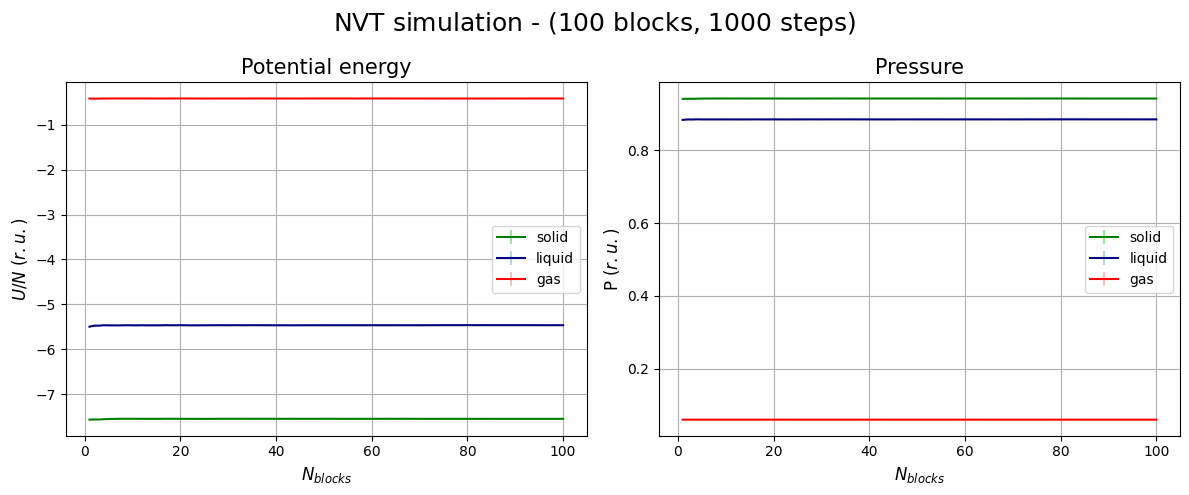

In [27]:
fig=plt.figure(figsize=(12,5))

ax1=fig.add_subplot(1,2,1)
ax1.errorbar(x=pot_solid_NVT[:,0],y=pot_solid_NVT[:,2],yerr=pot_solid_NVT[:,3],color='green',ecolor='lightgreen',label=r'solid')
ax1.errorbar(x=pot_liquid_NVT[:,0],y=pot_liquid_NVT[:,2],yerr=pot_liquid_NVT[:,3],color='navy',ecolor='lightblue',label=r'liquid')
ax1.errorbar(x=pot_gas_NVT[:,0],y=pot_gas_NVT[:,2],yerr=pot_gas_NVT[:,3],color='red',ecolor=(1.0, 0.0, 0.0, 0.25),label=r'gas')
ax1.set_xlabel(r'$N_{blocks}$',fontsize=12)
ax1.set_ylabel(r'$U/N$ ($r.u.$)',fontsize=12)
ax1.set_title(r'Potential energy',fontsize=15)
ax1.grid(True)
ax1.legend()

ax2=fig.add_subplot(1,2,2)
ax2.errorbar(x=pre_solid_NVT[:,0],y=pre_solid_NVT[:,2],yerr=pre_solid_NVT[:,3],color='green',ecolor='lightgreen',label=r'solid')
ax2.errorbar(x=pre_liquid_NVT[:,0],y=pre_liquid_NVT[:,2],yerr=pre_liquid_NVT[:,3],color='navy',ecolor='lightblue',label=r'liquid')
ax2.errorbar(x=pre_gas_NVT[:,0],y=pre_gas_NVT[:,2],yerr=pre_gas_NVT[:,3],color='red',ecolor=(1.0, 0.0, 0.0, 0.25),label=r'gas')
ax2.set_xlabel(r'$N_{blocks}$',fontsize=12)
ax2.set_ylabel(r'P ($r.u.$)',fontsize=12)
ax2.set_title(r'Pressure',fontsize=15)
ax2.legend()
ax2.grid(True)

plt.suptitle(r'NVT simulation - ($100$ blocks, $1000$ steps)',fontsize=18)
plt.tight_layout()
plt.show()

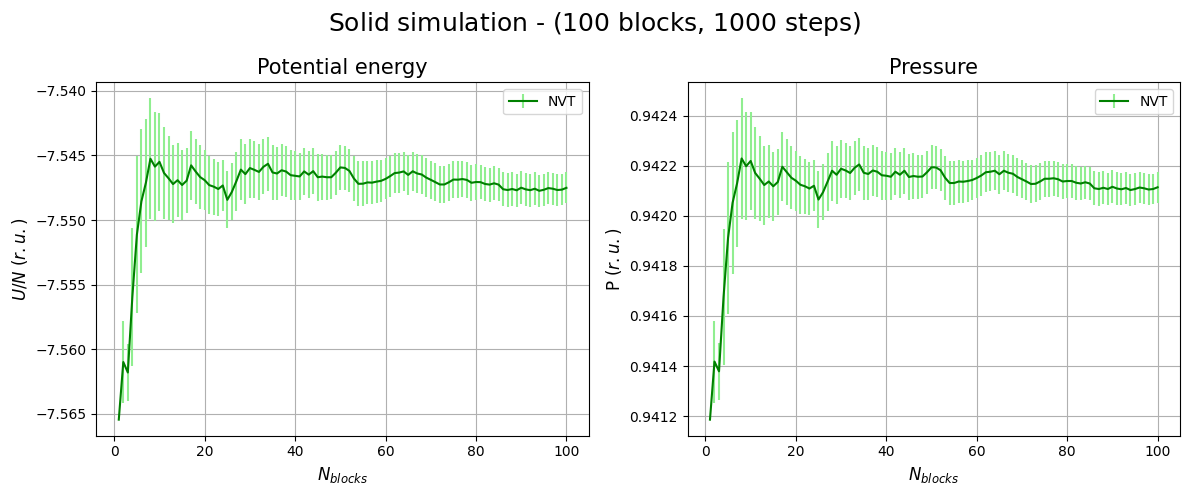

In [31]:
fig=plt.figure(figsize=(12,5))

ax1=fig.add_subplot(1,2,1)
ax1.errorbar(x=pot_solid_NVT[:,0],y=pot_solid_NVT[:,2],yerr=pot_solid_NVT[:,3],color='green',ecolor='lightgreen',label=r'NVT')
ax1.set_xlabel(r'$N_{blocks}$',fontsize=12)
ax1.set_ylabel(r'$U/N$ ($r.u.$)',fontsize=12)
ax1.set_title(r'Potential energy',fontsize=15)
ax1.grid(True)
ax1.legend()

ax2=fig.add_subplot(1,2,2)
ax2.errorbar(x=pre_solid_NVT[:,0],y=pre_solid_NVT[:,2],yerr=pre_solid_NVT[:,3],color='green',ecolor='lightgreen',label=r'NVT')
ax2.set_xlabel(r'$N_{blocks}$',fontsize=12)
ax2.set_ylabel(r'P ($r.u.$)',fontsize=12)
ax2.set_title(r'Pressure',fontsize=15)
ax2.legend()
ax2.grid(True)

plt.suptitle(r'Solid simulation - ($100$ blocks, $1000$ steps)',fontsize=18)
plt.tight_layout()
plt.show()

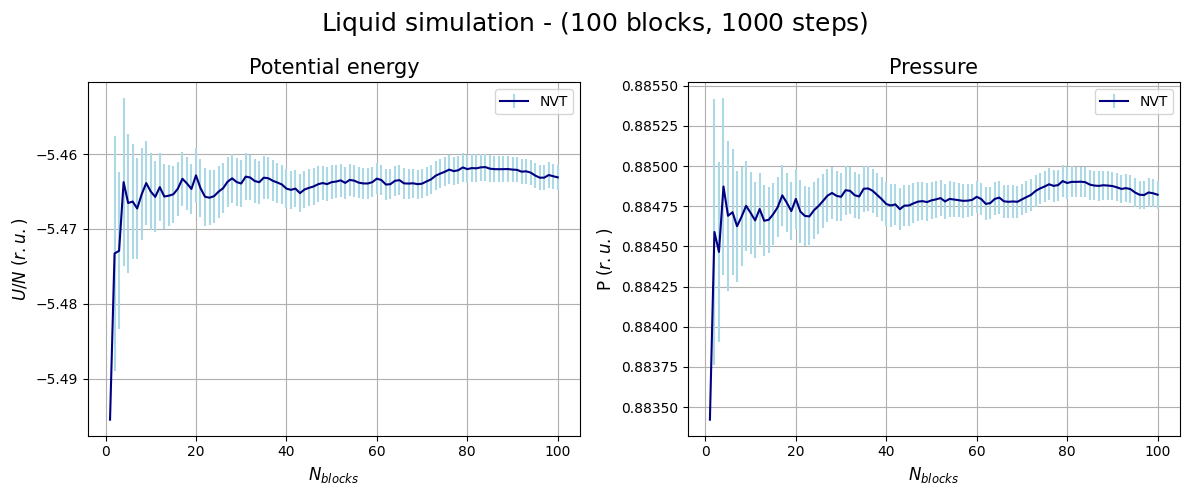

In [30]:
fig=plt.figure(figsize=(12,5))

ax1=fig.add_subplot(1,2,1)
ax1.errorbar(x=pot_liquid_NVT[:,0],y=pot_liquid_NVT[:,2],yerr=pot_liquid_NVT[:,3],color='navy',ecolor='lightblue',label=r'NVT')
ax1.set_xlabel(r'$N_{blocks}$',fontsize=12)
ax1.set_ylabel(r'$U/N$ ($r.u.$)',fontsize=12)
ax1.set_title(r'Potential energy',fontsize=15)
ax1.grid(True)
ax1.legend()

ax2=fig.add_subplot(1,2,2)
ax2.errorbar(x=pre_liquid_NVT[:,0],y=pre_liquid_NVT[:,2],yerr=pre_liquid_NVT[:,3],color='navy',ecolor='lightblue',label=r'NVT')
ax2.set_xlabel(r'$N_{blocks}$',fontsize=12)
ax2.set_ylabel(r'P ($r.u.$)',fontsize=12)
ax2.set_title(r'Pressure',fontsize=15)
ax2.legend()
ax2.grid(True)

plt.suptitle(r'Liquid simulation - ($100$ blocks, $1000$ steps)',fontsize=18)
plt.tight_layout()
plt.show()

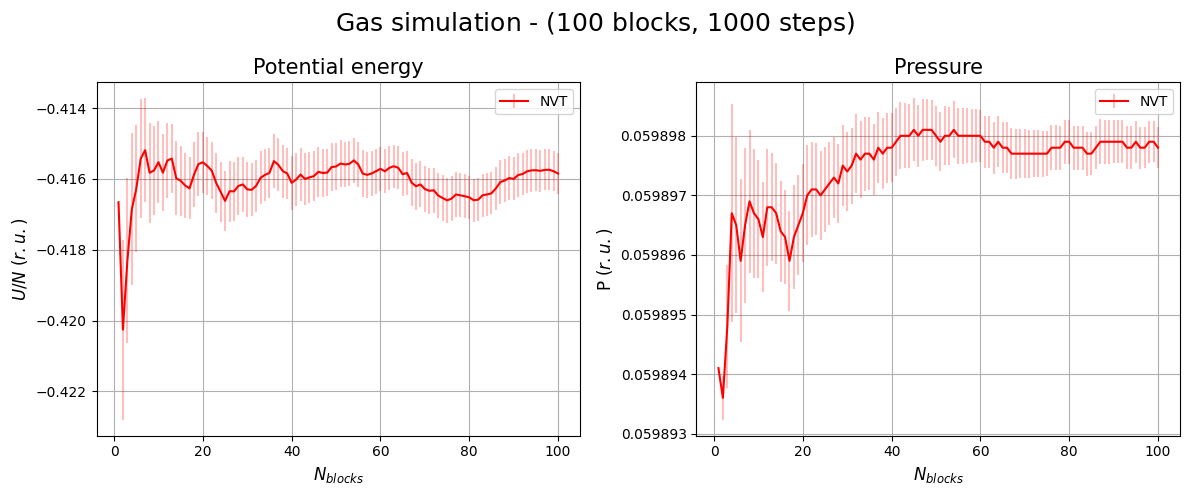

In [29]:
fig=plt.figure(figsize=(12,5))

ax1=fig.add_subplot(1,2,1)
ax1.errorbar(x=pot_gas_NVT[:,0],y=pot_gas_NVT[:,2],yerr=pot_gas_NVT[:,3],color='red',ecolor=(1.0, 0.0, 0.0, 0.25),label=r'NVT')
ax1.set_xlabel(r'$N_{blocks}$',fontsize=12)
ax1.set_ylabel(r'$U/N$ ($r.u.$)',fontsize=12)
ax1.set_title(r'Potential energy',fontsize=15)
ax1.grid(True)
ax1.legend()

ax2=fig.add_subplot(1,2,2)
ax2.errorbar(x=pre_gas_NVT[:,0],y=pre_gas_NVT[:,2],yerr=pre_gas_NVT[:,3],color='red',ecolor=(1.0, 0.0, 0.0, 0.25),label=r'NVT')
ax2.set_xlabel(r'$N_{blocks}$',fontsize=12)
ax2.set_ylabel(r'P ($r.u.$)',fontsize=12)
ax2.ticklabel_format(useOffset=False)
ax2.set_title(r'Pressure',fontsize=15)
ax2.legend()
ax2.grid(True)

plt.suptitle(r'Gas simulation - ($100$ blocks, $1000$ steps)',fontsize=18)
plt.tight_layout()
plt.show()